In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
mydata=pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Ml_Data\drug_dt.csv")

In [3]:
mydata.head(1)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY


In [4]:
mydata.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [5]:
mydata.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


<Axes: xlabel='Sex', ylabel='count'>

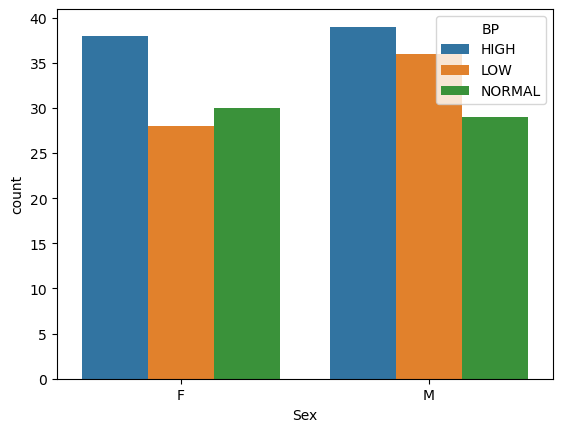

In [6]:
sb.countplot(x="Sex",data=mydata,hue="BP")

<Axes: xlabel='Sex', ylabel='count'>

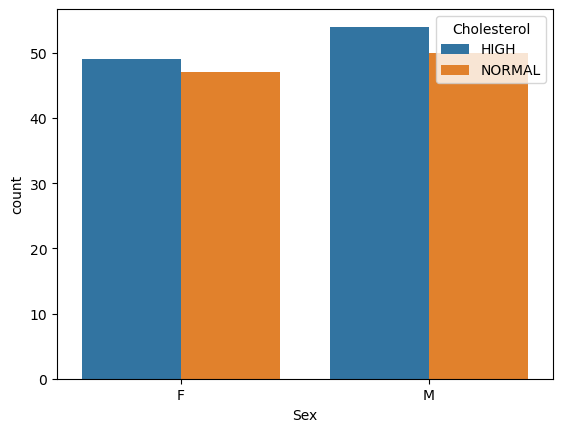

In [7]:
sb.countplot(x="Sex",data=mydata,hue="Cholesterol")

### Data Separation

In [8]:
mydata.head(1)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY


In [9]:
X_featue=mydata.iloc[:,0:5]
Y_target=mydata["Drug"]

In [10]:
#X_featue

### Level Encoding data ordinal

In [11]:
X_featue["Sex"]=X_featue["Sex"].map({"F":0,"M":1})
X_featue["BP"]=X_featue["BP"].map({"HIGH":2,"LOW":0,"NORMAL":1})
X_featue["Cholesterol"]=X_featue["Cholesterol"].map({"HIGH":1,"NORMAL":0})

In [12]:
X_featue

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,2,1,25.355
1,47,1,0,1,13.093
2,47,1,0,1,10.114
3,28,0,1,1,7.798
4,61,0,0,1,18.043
...,...,...,...,...,...
195,56,0,0,1,11.567
196,16,1,0,1,12.006
197,52,1,1,1,9.894
198,23,1,1,0,14.020


### Split the Data into Training and Testing

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_trian,X_test,Y_train,Y_test=train_test_split(X_featue,Y_target,test_size=.30,random_state=101)

In [15]:
#X_test

### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr_model=LogisticRegression()
lr_learner=lr_model.fit(X_trian,Y_train)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Accuracy LR Model

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
YP_lr=lr_learner.predict(X_test)
acc_lr=accuracy_score(YP_lr,Y_test)*100
print(f"Accuray of LR Model is {acc_lr}")

Accuray of LR Model is 76.66666666666667


## Decision Tree 

In [20]:
model_dt=DecisionTreeClassifier(random_state=0)
dt_learner=model_dt.fit(X_trian,Y_train)

In [21]:
YP_dt=dt_learner.predict(X_test)
acc_dt=accuracy_score(YP_dt,Y_test)*100
print(f"Accuray of DT Model is {acc_dt}")

Accuray of DT Model is 98.33333333333333


# Classification Report 

In [22]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

### Logistic Regression

In [23]:
cr_lr=classification_report(Y_test,YP_lr)
print("Classification Report for LR",cr_lr)

Classification Report for LR               precision    recall  f1-score   support

       drugA       0.86      1.00      0.92         6
       drugB       1.00      0.67      0.80         6
       drugC       1.00      0.11      0.20         9
       drugX       0.56      0.69      0.62        13
       drugY       0.81      1.00      0.90        26

    accuracy                           0.77        60
   macro avg       0.85      0.69      0.69        60
weighted avg       0.81      0.77      0.73        60



### Decision Tree 

In [24]:
cr_dt=classification_report(Y_test,YP_dt)
print("Classification Report for LR",cr_dt)

Classification Report for LR               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         9
       drugX       1.00      0.92      0.96        13
       drugY       0.96      1.00      0.98        26

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.99        60
weighted avg       0.98      0.98      0.98        60



### Important Feature 

In [25]:
dt_learner.feature_importances_

array([0.13299359, 0.        , 0.26732616, 0.09338373, 0.50629652])

In [26]:
feature_score=pd.Series(dt_learner.feature_importances_,index=X_trian.columns).sort_values(ascending=False)

In [27]:
feature_score

Na_to_K        0.506297
BP             0.267326
Age            0.132994
Cholesterol    0.093384
Sex            0.000000
dtype: float64

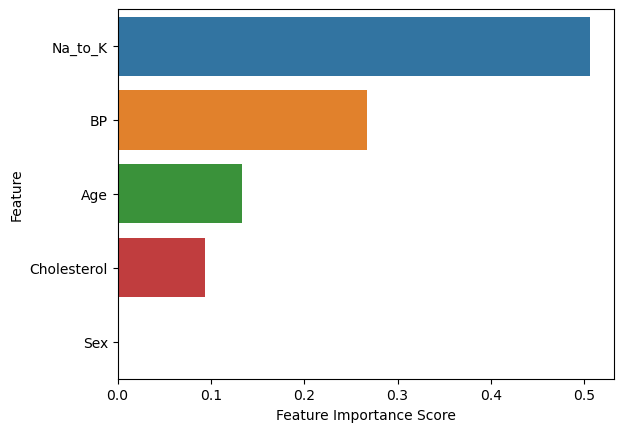

In [28]:
sb.barplot(x=feature_score,y=feature_score.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.show()

### Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
model_rf=RandomForestClassifier(random_state=0,n_estimators=10)

In [31]:
rf_learner=model_rf.fit(X_trian,Y_train)

In [32]:
Yp_rf=rf_learner.predict(X_test)

In [33]:
acc_rf=accuracy_score(Y_test,Yp_rf)*100
print("acc of rf is",acc_rf)

acc of rf is 98.33333333333333


In [34]:
feature_score_rf=pd.Series(rf_learner.feature_importances_,index=X_trian.columns).sort_values(ascending=False)

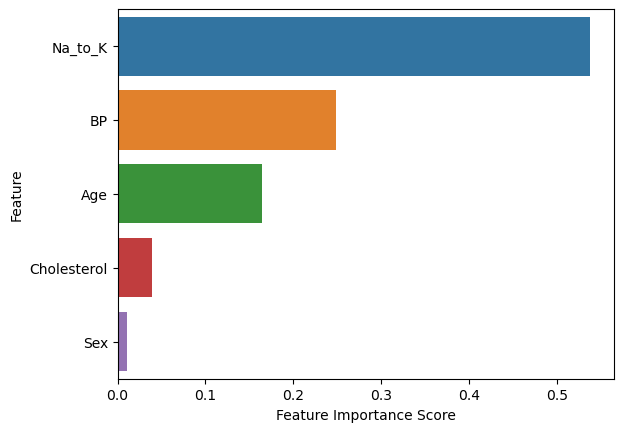

In [35]:
sb.barplot(x=feature_score_rf,y=feature_score_rf.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.show()

# svm

In [36]:
from sklearn.svm import SVC

In [37]:
model_svm=SVC()

In [38]:
learner_svm=model_svm.fit(X_trian,Y_train)

### PyCaret

In [42]:
! pip install pycaret

  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 1
  
  [262 lines of output]
  Ignoring numpy: markers 'python_version == "3.7" and (platform_machine != "arm64" or platform_system != "Darwin") and platform_machine != "aarch64"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.8" and (platform_machine != "arm64" or platform_system != "Darwin") and platform_machine != "aarch64"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.7" and platform_machine == "aarch64"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.8" and platform_machine == "aarch64"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.8" and platform_machine == "arm64" and platform_system == "Darwin"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.9" and platform_machine == "arm64" and platform_system == "Da

                                              0.0/484.4 kB ? eta -:--:--
     ---                                     41.0/484.4 kB 1.9 MB/s eta 0:00:01
     --------                               102.4/484.4 kB 1.2 MB/s eta 0:00:01
     ------------------                     235.5/484.4 kB 1.6 MB/s eta 0:00:01
     ----------------------------           368.6/484.4 kB 1.9 MB/s eta 0:00:01
     -------------------------------------  481.3/484.4 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 484.4/484.4 kB 1.8 MB/s eta 0:00:00
                                              0.0/14.6 MB ? eta -:--:--
                                              0.3/14.6 MB 9.6 MB/s eta 0:00:02
     -                                        0.6/14.6 MB 6.5 MB/s eta 0:00:03
     --                                       0.9/14.6 MB 6.5 MB/s eta 0:00:03
     ---                                      1.4/14.6 MB 6.6 MB/s eta 0:00:03
     ----                                     1.7/14.6 MB 6

In [39]:
from pycaret.classification import *

ModuleNotFoundError: No module named 'pycaret'

In [ ]:
Cat_Fet=X_featue.columns.tolist()

In [ ]:
Cat_Fet

In [ ]:
Cat_Fet=Cat_Fet[0:4]
Cat_Fet

In [ ]:
#Y_targer

In [ ]:
X_featue["Target"]=Y_targer

In [ ]:
experiment=setup(X_featue,target='Target',categorical_features=Cat_Fet)

In [ ]:
best_model=compare_models()